## Deep Convolution Neural Networks(AlexNet)
Although convolutional neural networks were well known in the computer vision and machine learning
communities following the introduction of LeNet, they did not immediately dominate the field. Although
LeNet achieved good results on early small data sets, the performance and feasibility of training convolutional
networks on larger, more realistic datasets had yet to be established In fact, for much of the intervening time
between the early 1990s and the watershed results of 2012, neural networks were often surpassed by other
machine learning methods, such as support vector machines.
For computer vision, this comparison is perhaps not fair. That’s although the inputs to convolutional
networks consist of raw or lightly-processed (e.g., by centering) pixel values, practitioners would never
feed raw pixels into traditional models. Instead, typical computer vision pipelines consisted of manually
engineering feature extraction pipelines. Rather than learn the features, the features were crafted. Most of
the progress came from having more clever ideas for features, and the learning algorithm was often relegated
to an afterthought.
Although some neural network accelerators were available in the 1990s, they were not yet sufficiently powerful
to make deep multichannel, multilayer convolutional neural networks with a large number of parameters.
Moreover, datasets were still relatively small. Added to these obstacles, key tricks for training neural networks
including parameter initialization heuristics, clever variants of stochastic gradient descent, non-squashing
activation functions, and effective regularization techniques were still missing.
Thus, rather than training end-to-end (pixel to classification) systems, classical pipelines looked more like
this:

1. Obtain an interesting dataset. In early days, these datasets required expensive sensors (at the time, 1
megapixel images were state of the art)

2. Preprocess the dataset with hand-crafted features based on some knowledge of optics, geometry, other
analytic tools, and occasionally on the serendipitous discoveries of lucky graduate students.
3. Feed the data through a standard set of feature extractors such as SIFT122, the Scale-Invariant Feature
Transform, or SURF123, the Speeded-Up Robust Features, or any number of other hand-tuned
pipelines.
4. Dummp the resulting representations into your favorite classifier, likely a linear model or kernel method,
to learn a classifier.
If you spoke to machine learning researchers, they believed that machine learning was both important and
beautiful. Elegant theories proved the properties of various classifiers. The field of machine learning was
thriving, rigorous and eminently useful. However, if you spoke to a computer vision researcher, you’d hear
a very different story. The dirty truth of image recognition, they’d tell you, is that features, not learning
algorithms, drove progress. Computer vision researchers justifiably believed that a slightly bigger or cleaner
dataset or a slightly improved feature-extraction pipeline mattered far more to the final accuracy than any
learning algorithm.

### Learning Feature Representation

Another way to cast the state of affairs is that the most important part of the pipeline was the representation.
And up until 2012 the representation was calculated mechanically. In fact, engineering a new set of feature
functions, improving results, and writing up the method was a prominent genre of paper. SIFT124, SURF125,
HOG126, Bags of visual words127 and similar feature extractors ruled the roost.
Another group of researchers, including Yann LeCun, Geoff Hinton, Yoshua Bengio, Andrew Ng, Shun-ichi
Amari, and Juergen Schmidhuber, had different plans. They believed that features themselves ought to be
learned. Moreover, they believed that to be reasonably complex, the features ought to be hierarchically
composed with multiple jointly learned layers, each with learnable parameters. In the case of an image, the
lowest layers might come to detect edges, colors, and textures. Indeed, Krizhevski, Sutskever and Hinton,
2012128 designed a new variant of a convolutional neural network which achieved excellent performance in
the ImageNet challenge.
Interestingly in the lowest layers of the network, the model learned feature extractors that resembled some
traditional filters. The figure below is reproduced from this paper and describes lower-level image descriptors.
Higher layers in the network might build upon these representations to represent larger structures, like eyes,
noses, blades of grass, etc. Even higher layers might represent whole objects like people, airplanes, dogs, or
frisbees. Ultimately, the final hidden state learns a compact representation of the image that summarizes its
contents such that data belonging to different categories be separated easily.
While the ultimate breakthrough for many-layered convolutional networks came in 2012, a core group of
researchers had dedicated themselves to this idea, attempting to learn hierarchical representations of visual
data for many years. The ultimate breakthrough in 2012 can be attributed to two key factors.

### Missing Ingredient- Data
Deep models with many layers require large amounts of data in order to enter the regime where they significantly
outperform traditional methods based on convex optimizations (e.g. linear and kernel methods).

However, given the limited storage capacity of computers, the relative expense of sensors, and the comparatively
tighter research budgets in the 1990s, most research relied on tiny datasets. Numerous papers
addressed the UCI collection of datasets, many of which contained only hundreds or (a few) thousands of
images captured in unnatural settings with low resolution.
In 2009, the ImageNet data set was released, challenging researchers to learn models from 1 million examples,
1,000 each from 1,000 distinct categories of objects. The researchers, led by Fei-Fei Li, who introduced this
dataset leveraged Google Image Search to prefilter large candidate sets for each category and employed
the Amazon Mechanical Turk crowdsourcing pipeline to confirm for each image whether it belonged to
the associated category. This scale was unprecedented. The associated competition, dubbed the ImageNet
Challenge pushed computer vision and machine learning research forward, challenging researchers to identify
which models performed best at a greater scale than academics had previously considered.

### Missing Ingredient-Hardware
Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs,
and each iteration requires passing data through many layers of computationally-expensive linear algebra
operations. This is one of the main reasons why in the 90s and early 2000s, simple algorithms based on the
more-efficiently optimized convex objectives were preferred.
Graphical processing units (GPUs) proved to be a game changer in make deep learning feasible. These
chips had long been developed for accelerating graphics processing to benefit computer games. In particular,
they were optimized for high throughput 4x4 matrix-vector products, which are needed for many computer
graphics tasks. Fortunately, this math is strikingly similar to that required to calculate convolutional layers.
Around that time, NVIDIA and ATI had begun optimizing GPUs for general compute operations, going as
far as to market them as General Purpose GPUs (GPGPU).
Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs,
and each iteration requires passing data through many layers of computationally-expensive linear algebra
operations. This is one of the main reasons why in the 90s and early 2000s, simple algorithms based on the
more-efficiently optimized convex objectives were preferred.
Graphical processing units (GPUs) proved to be a game changer in make deep learning feasible. These
chips had long been developed for accelerating graphics processing to benefit computer games. In particular,
they were optimized for high throughput 4x4 matrix-vector products, which are needed for many computer
graphics tasks. Fortunately, this math is strikingly similar to that required to calculate convolutional layers.
Around that time, NVIDIA and ATI had begun optimizing GPUs for general compute operations, going as
far as to market them as General Purpose GPUs (GPGPU).

## AlexNet
AlexNet was introduced in 2012, named after Alex Krizhevsky, the first author of the breakthrough ImageNet
classification paper130. AlexNet, which employed an 8-layer convolutional neural network, won the ImageNet
Large Scale Visual Recognition Challenge 2012 by a phenomenally large margin. This network proved, for
the first time, that the features obtained by learning can transcend manually-design features, breaking the
previous paradigm in computer vision. The architectures of AlexNet and LeNet are very similar, as the
diagram below illustrates. Note that we provide a slightly streamlined version of AlexNet removing some of
the design quirks that were needed in 2012 to make the model fit on two small GPUs.
The design philosophies of AlexNet and LeNet are very similar, but there are also significant differences.
First, AlexNet is much deeper than the comparatively small LeNet5. AlexNet consists of eight layers:
five convolutional layers, two fully-connected hidden layers, and one fully-connected output layer. Second,
AlexNet used the ReLU instead of the sigmoid as its activation function. Let’s delve into the details below.

### Architecture
In AlexNet’s first layer, the convolution window shape is 11 x 11. Since most images in ImageNet are more
than ten times higher and wider than the MNIST images, objects in ImageNet data tend to occupy more
pixels. Consequently, a larger convolution window is needed to capture the object. The convolution window
shape in the second layer is reduced to 5x5, followed by 3x3. In addition, after the first, second, and fifth
convolutional layers, the network adds maximum pooling layers with a window shape of 3 x 3 and a stride
of 2. Moreover, AlexNet has ten times more convolution channels than LeNet.

After the last convolutional layer are two fully-connected layers with 4096 outputs. These two huge fullyconnected
layers produce model parameters of nearly 1 GB. Due to the limited memory in early GPUs, the
original AlexNet used a dual data stream design, so that each of their two GPUs could be responsible for
storing and computing only its half of the model. Fortunately, GPU memory is comparatively abundant now,
so we rarely need to break up models across GPUs these days (our version of the AlexNet model deviates
from the original paper in this aspect).

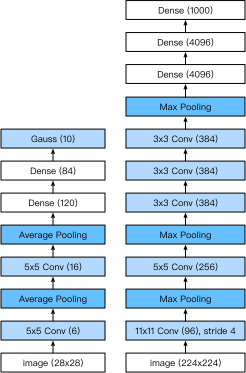

In [1]:
from IPython.display import SVG
SVG(filename="../img/alexnet-all.svg")

LeNet(Left) and AlexNet(right)

### Activation Functions
Second, AlexNet changed the sigmoid activation function to a simpler ReLU activation function. On the
one hand, the computation of the ReLU activation function is simpler. For example, it does not have the
exponentiation operation found in the sigmoid activation function. On the other hand, the ReLU activation
function makes model training easier when using different parameter initialization methods. This is because,
when the output of the sigmoid activation function is very close to 0 or 1, the gradient of these regions is
almost 0, so that back propagation cannot continue to update some of the model parameters. In contrast,
the gradient of the ReLU activation function in the positive interval is always 1. Therefore, if the model
parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 in the positive
interval, so that the model cannot be effectively trained.

### Capacity Control Preprocessing
AlexNet controls the model complexity of the fully-connected layer by dropout (Section 6.6), while LeNet
only uses weight decay. To augment the data even further, the training loop of AlexNet added a great deal
of image augmentation, such as flipping, clipping, and color changes. This makes the model more robust and
the larger sample size effectively reduces overfitting. We will discuss data augmentation in greater detail in
Section 14.1.

In [2]:
import sys
sys.path.insert (0,'..')

In [3]:
import d2l
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

net = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            Flatten(),
            nn.Dropout(p=0.5,inplace=True),
            nn.Linear(in_features=6400,out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(p=0.5,inplace=True),
            nn.Linear(in_features=4096,out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096,out_features=10)
            )

We construct a single-channel data instance with both height and width of 224 to observe the output shape
of each layer. It matches our diagram above.

In [5]:
X = torch.randn(size=(1,1,224,224))

for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Dropout Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout2d Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([

### Reading Data
Although AlexNet uses ImageNet in the paper, we use Fashion-MNIST here since training an ImageNet
model to convergence could take hours or days even on a modern GPU. One of the problems with applying
AlexNet directly on Fashion-MNIST is that our images are lower resolution (28 x 28 pixels) than ImageNet
images. To make things work, we upsample them to 244 x 244 (generally not a smart practice, but we do it
here to be faithful to the AlexNet architecture). We perform this resizing with the Resize class, inserting
it into the processing pipeline before using the ToTensor class. The Compose class concatenates these two
changes for easy invocation.

### Training
Now, we can start training AlexNet. Compared to LeNet in the previous section, the main change here is
the use of a smaller learning rate and much slower training due to the deeper and wider network, the higher
image resolution and the more costly convolutions.

In [6]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

In [7]:
lr, num_epochs, device = 0.01, 5, d2l.try_gpu()
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)

net.apply(init_weights)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0005)
criterion = nn.CrossEntropyLoss()
d2l.train_ch5(net, train_iter, test_iter, criterion, num_epochs, batch_size, device, lr)

training on cuda:0
epoch 1, loss 0.0127, train acc 0.393, test acc 0.712, time 31.3 sec
epoch 2, loss 0.0056, train acc 0.733, test acc 0.776, time 30.8 sec
epoch 3, loss 0.0045, train acc 0.782, test acc 0.806, time 32.1 sec
epoch 4, loss 0.0040, train acc 0.809, test acc 0.831, time 32.0 sec
epoch 5, loss 0.0037, train acc 0.826, test acc 0.844, time 32.2 sec


## Summary

* AlexNet has a similar structure to that of LeNet, but uses more convolutional layers and a larger parameter space to fit the large-scale data set ImageNet.
* Today AlexNet has been surpassed by much more effective architectures but it is a key step from shallow to deep networks that are used nowadays.
* Although it seems that there are only a few more lines in AlexNet's implementation than in LeNet, it took the academic community many years to embrace this conceptual change and take advantage of its excellent experimental results. This was also due to the lack of efficient computational tools.
* Dropout, ReLU and preprocessing were the other key steps in achieving excellent performance in computer vision tasks.

## Exercises

1. Try increasing the number of epochs. Compared with LeNet, how are the results different? Why?
2. AlexNet may be too complex for the Fashion-MNIST data set.
    * Try to simplify the model to make the training faster, while ensuring that the accuracy does not drop significantly.
    * Can you design a better model that works directly on $28 \times 28$ images.
3. Modify the batch size, and observe the changes in accuracy and GPU memory.
4. Rooflines
    * What is the dominant part for the memory footprint of AlexNet?
    * What is the dominant part for computation in AlexNet?
    * How about memory bandwidth when computing the results?
5. Apply dropout and ReLU to LeNet5. Does it improve? How about preprocessing?